In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib.cm as cm

## Single evolution - parallel computations


In [2]:
df = pd.read_csv("POOL_single_evo_parallel_computation.csv")
df.head()

,n_particles,parallel_time,serial_time,Pool,ThreadPool
0,100,0.036713,0.001929,True,False
0,350,0.086851,0.025964,True,False
0,600,0.099155,0.068446,True,False
0,850,0.094215,0.132999,True,False
0,1100,0.105034,0.182183,True,False


In [3]:
std_group = df.groupby("n_particles")[["parallel_time","serial_time"]].agg(["mean","std"])
std_group.head()

parallel_time           serial_time          
                     mean       std        mean       std
n_particles                                              
100              0.043843  0.007840    0.002662  0.000512
350              0.132589  0.054529    0.042379  0.019549
600              0.133774  0.051375    0.103620  0.013670
850              0.133858  0.029624    0.183317  0.026746
1100             0.170684  0.039825    0.290276  0.041934

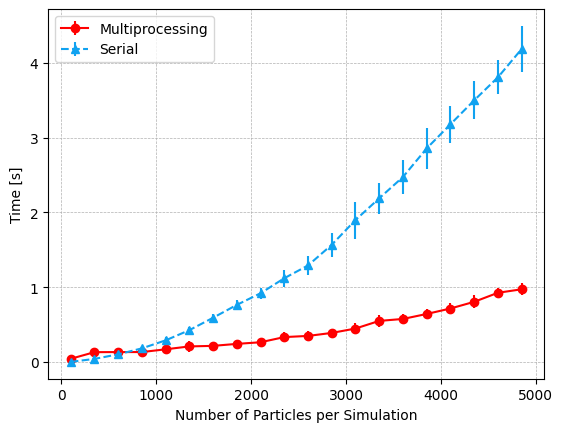

In [17]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles = std_group["parallel_time"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles, std_group["parallel_time"].values[:,0], yerr=std_group["parallel_time"].values[:,1], marker="o", label="Multiprocessing", c=colors[9], linestyle='-')
ax.errorbar(n_particles, std_group["serial_time"].values[:,0], yerr=std_group["serial_time"].values[:,1], marker="^", label="Serial", c=colors[2], linestyle='--')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

#plt.savefig("single_evo_parallel_computation.pdf")
# Show the plot
plt.show()


In [ ]:
df2 = pd.read_csv("THREADPOOL_single_evo_parallel_computation.csv")
df2.head()

In [ ]:
std_group2 = df2.groupby("n_particles")[["time_single_parallel","time_single_serial"]].agg(["mean","std"])
std_group2.head()

### Questo carino
#### Pool vs Threadpool: they're equal

In [ ]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles2 = std_group2["time_single_parallel"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles2, std_group2["time_single_parallel"].values[:,0], yerr=std_group2["time_single_parallel"].values[:,1], marker="o", label="ThreadPool", c=colors[9], linestyle='--')
ax.errorbar(n_particles, std_group["parallel_time"].values[:,0], yerr=std_group["parallel_time"].values[:,1], marker="^", label="Pool", c=colors[1], linestyle='-')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

#plt.savefig("Pool_vs_ThreadPool.pdf")
# Show the plot
plt.show()


# For loop single evolution multiple simulations

In [9]:
df3 = pd.read_csv("for_loop_single_evo_mpx.csv")
df3.head()

,index,n_particles,parallel_time,serial_time,tstep/tot_evo_time
0,0,250,0.121772,0.209709,1.0
1,0,500,0.486809,0.866462,1.0
2,0,750,0.942138,1.921830,1.0
3,0,1000,1.608712,3.298452,1.0
4,0,1250,2.523688,5.108926,1.0


In [10]:
std_group3 = df3.groupby("n_particles")[["parallel_time","serial_time"]].agg(["mean","std"])
std_group3.head()

parallel_time           serial_time          
                     mean       std        mean       std
n_particles                                              
250              0.152694  0.017296    0.277947  0.018740
500              0.591299  0.051619    0.965862  0.040382
750              1.344505  0.067428    2.080966  0.060416
1000             2.402087  0.091730    3.592441  0.133899
1250             3.807651  0.157571    5.542672  0.187561

In [ ]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles = std_group3["parallel_time"]["mean"].keys().get_level_values(0).values


ax.errorbar(n_particles, std_group3["parallel_time"].values[:,0], yerr=std_group3["parallel_time"].values[:,1], marker="o", label="Multiprocessing", c=colors[9], linestyle='-')
ax.errorbar(n_particles, std_group3["serial_time"].values[:,0], yerr=std_group3["serial_time"].values[:,1], marker="^", label="Serial", c=colors[2], linestyle='--')

# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

#plt.savefig("for_single_evo_parallel_compute.pdf")
# Show the plot
plt.show()


## Meglio mpx for o vectorized?

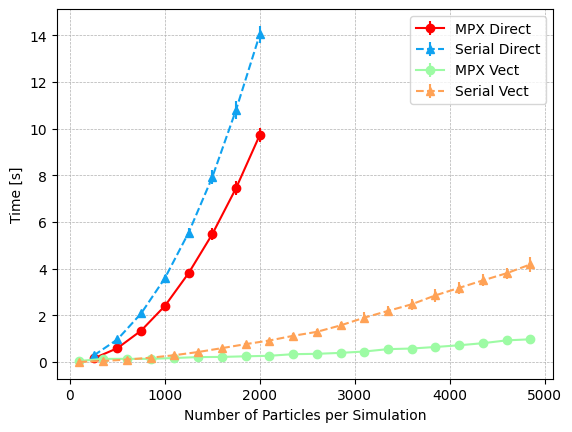

In [18]:
fig, ax = plt.subplots()

colors = [cm.rainbow(i) for i in np.linspace(0, 1, 10)]

i = 0 
# each group has n_particles fixed (that is its "name")
n_particles_for = std_group3["parallel_time"]["mean"].keys().get_level_values(0).values
n_particles_vect = std_group["parallel_time"]["mean"].keys().get_level_values(0).values

# std_group è vectorized
# std_group3 è for loop

ax.errorbar(n_particles_for, std_group3["parallel_time"].values[:,0], yerr=std_group3["parallel_time"].values[:,1], marker="o", label="MPX Direct", c=colors[9], linestyle='-')
ax.errorbar(n_particles_for, std_group3["serial_time"].values[:,0], yerr=std_group3["serial_time"].values[:,1], marker="^", label="Serial Direct", c=colors[2], linestyle='--')

ax.errorbar(n_particles_vect, std_group["parallel_time"].values[:,0], yerr=std_group["parallel_time"].values[:,1], marker="o", label="MPX Vect", c=colors[5], linestyle='-')
ax.errorbar(n_particles_vect, std_group["serial_time"].values[:,0], yerr=std_group["serial_time"].values[:,1], marker="^", label="Serial Vect", c=colors[7], linestyle='--')



# Set labels and title
ax.set_xlabel('Number of Particles per Simulation')
ax.set_ylabel('Time [s]')
#ax.set_title(f'Number of Parallel simulations = {name}')
ax.grid(linestyle='--', linewidth=0.5)


ax.legend()

plt.savefig("comparison_single_evo_parallel_compute.pdf")
# Show the plot
plt.show()
